In [ ]:
!nvidia-smi

Sun May 11 11:21:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             30W /   70W |     512MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics --upgrade -q

In [ ]:


from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# # Delete everything in /content
# !rm -rf /content/*

In [ ]:
# Just testing the pretrained model
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 112MB/s]
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 111MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 48.7ms
Speed: 2.8ms preprocess, 48.7ms inference, 148.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


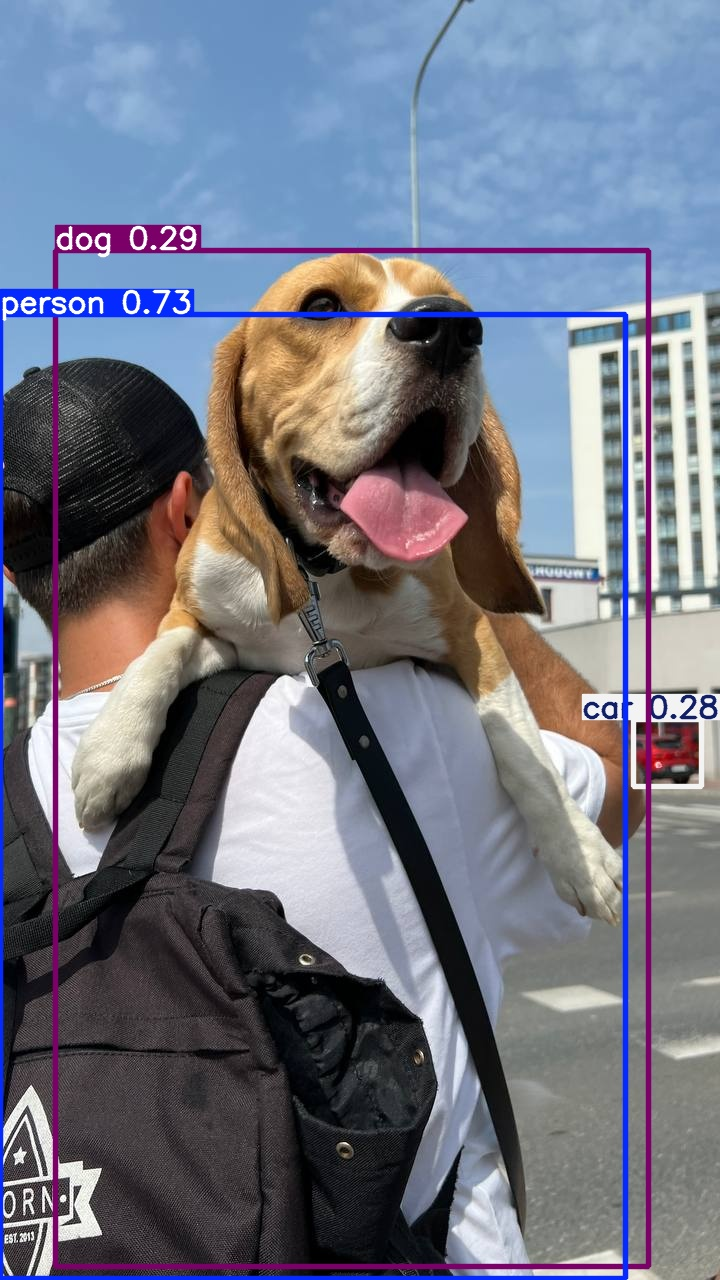

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpg', height=600)

In [ ]:
# Downloading dataset

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# Import the Roboflow class
from roboflow import Roboflow # This line is added to import the Roboflow class.

# Set up Roboflow and download using "raw" format
rf = Roboflow(api_key="SCdzbsMzhNfvVpjDp0mB")
project = rf.workspace("licenceplate-pfqqh").project("licence-plate-detection-kip63")
dataset = project.version(1).download("yolov12")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to licence-plate-detection-1 in yolov12:: 100%|██████████| 1064/1064 [00:00<00:00, 3271.54it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 107MB/s]
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/licence-plate-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_m

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	      train_batch2.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1080.jpg  val_batch1_pred.jpg
labels.jpg			 train_batch1081.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch1082.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch1.jpg     weights


/content


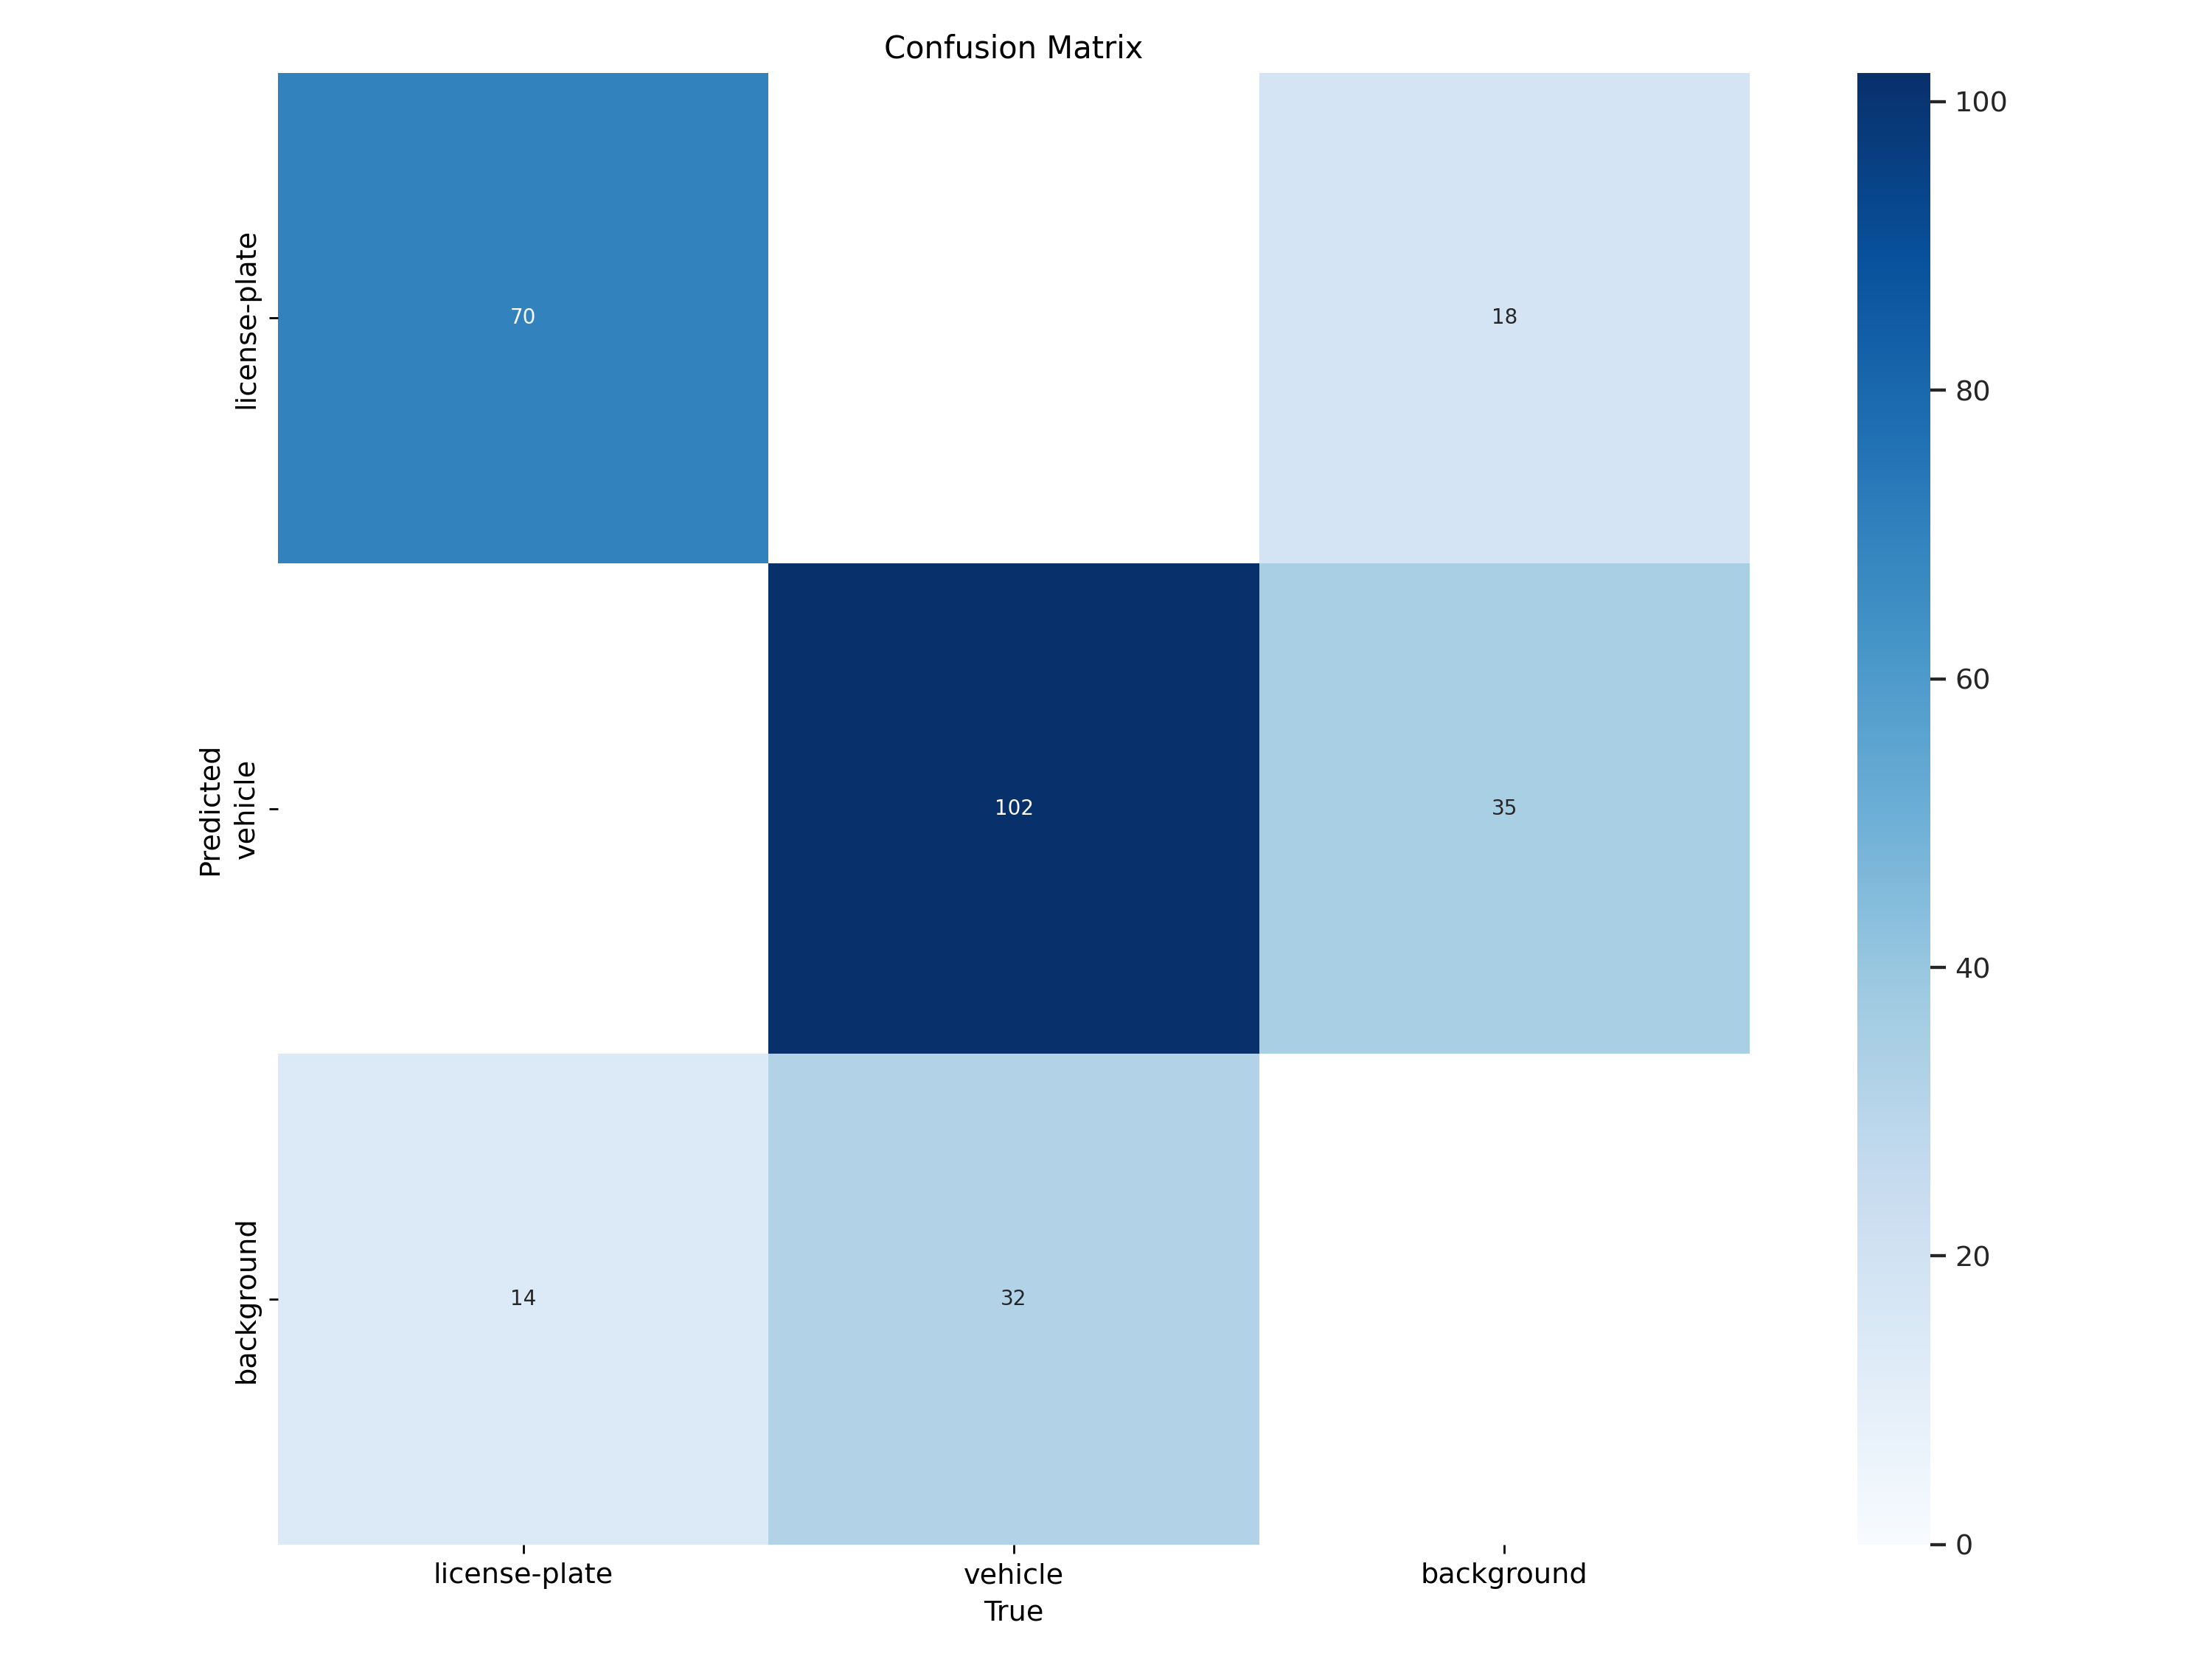

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


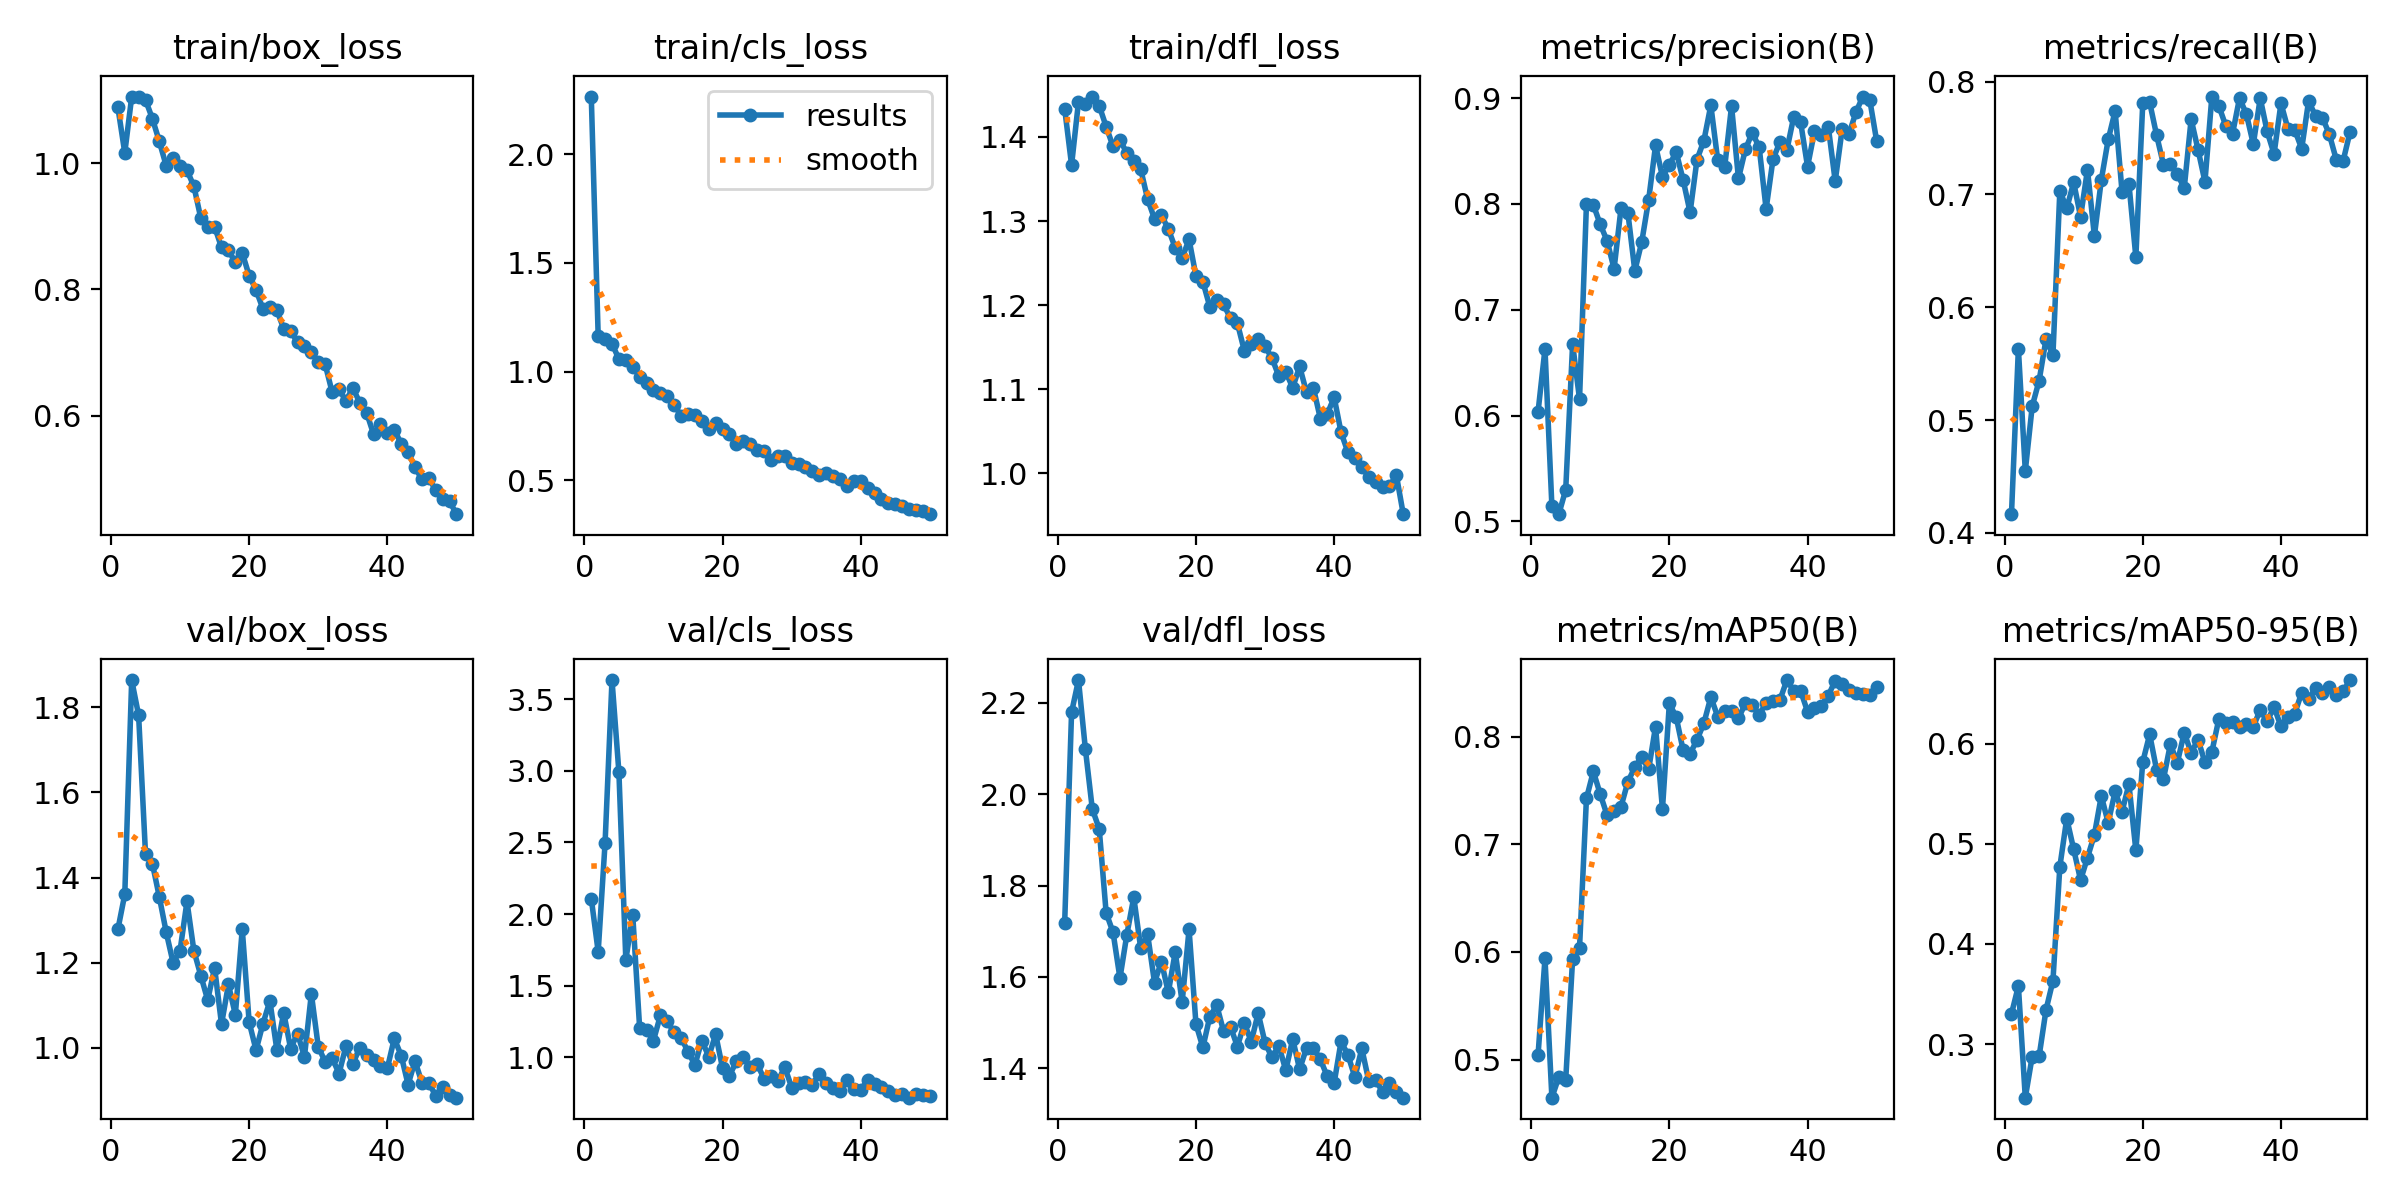

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


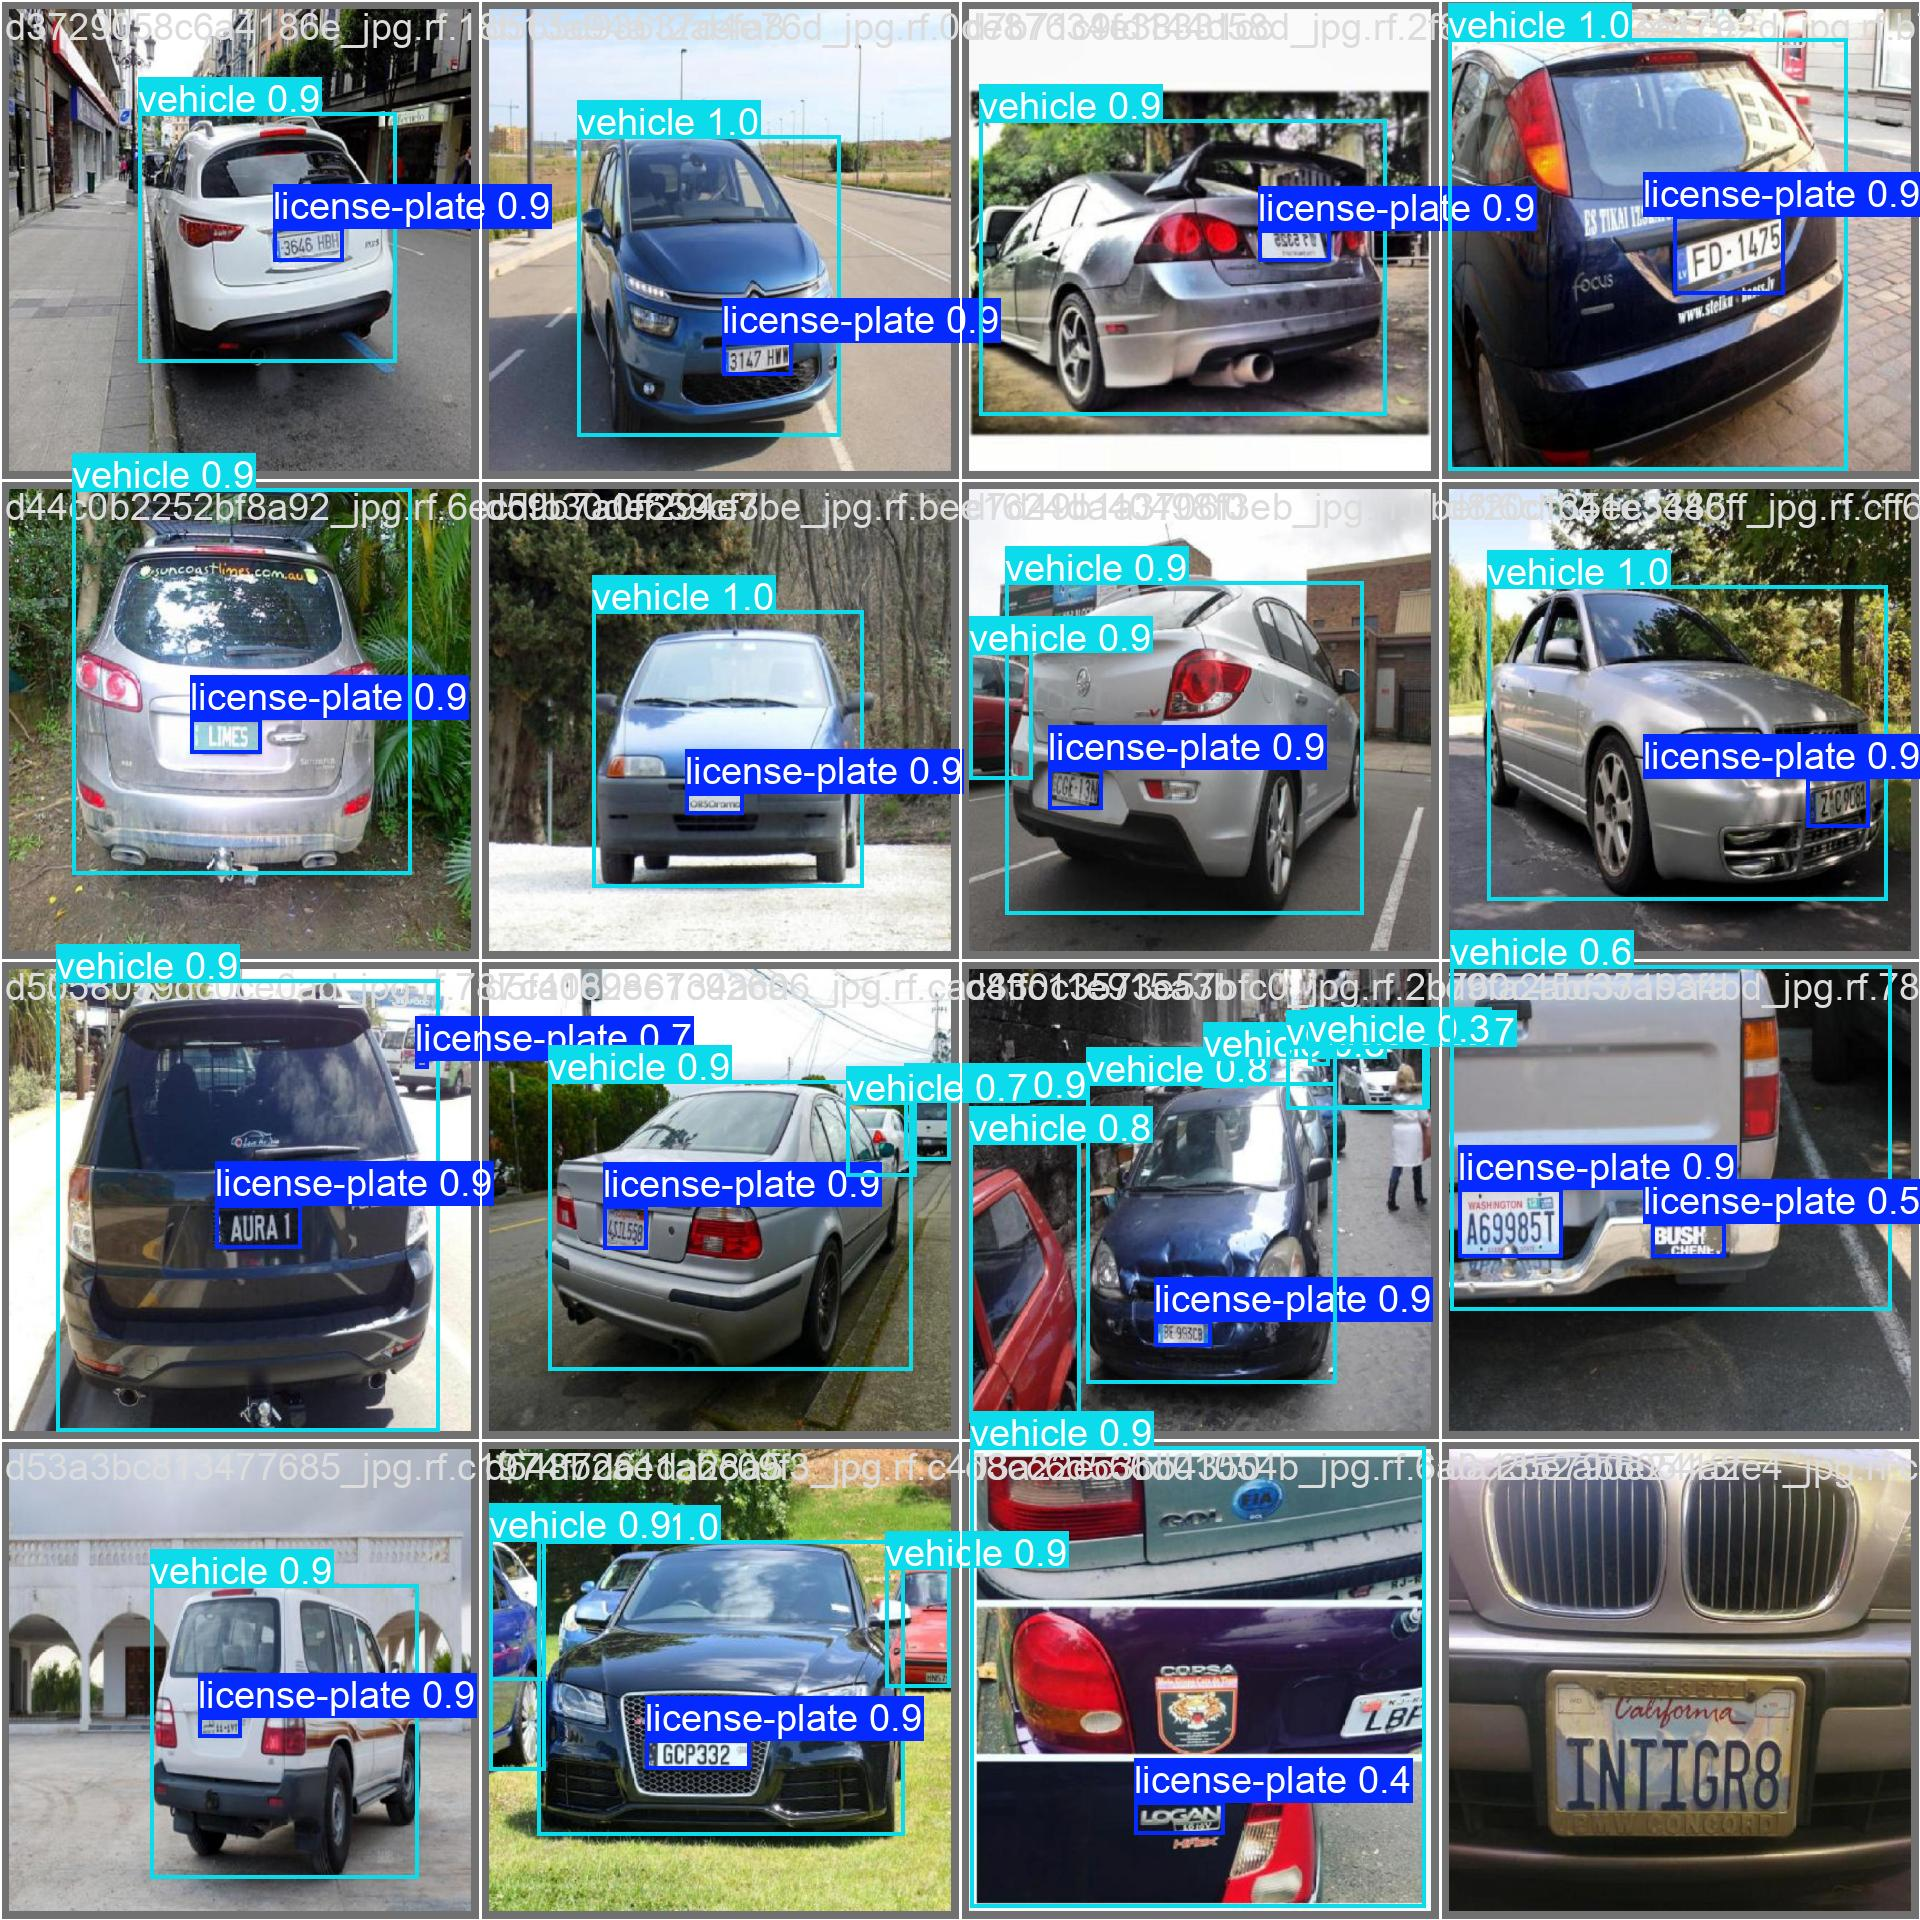

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1284.4±328.2 MB/s, size: 46.5 KB)
val: Scanning /content/datasets/licence-plate-detection-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100% 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.12s/it]
                   all         70        218      0.851      0.756      0.845      0.662
         license-plate         70         84       0.87       0.81      0.895       0.69
               vehicle         68        134      0.832      0.701      0.795      0.635
Speed: 24.1ms preprocess, 20.0ms inference, 0.3ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
val_output = """
Class     Images  Instances      Box(P          R      mAP50  mAP50-95)
all         70        218      0.851      0.756      0.845      0.662
license-plate         70         84       0.87       0.81      0.895       0.69
vehicle         68        134      0.832      0.701      0.795      0.635
"""

import re

# Extract metrics for 'all' class
metrics_line = re.search(r'all\s+\d+\s+\d+\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)', val_output)
if metrics_line:
    precision, recall, map50, map5095 = map(float, metrics_line.groups())
    print(f"📊 Parsed Metrics:\nPrecision: {precision}\nRecall: {recall}\nmAP@0.5: {map50}\nmAP@0.5:0.95: {map5095}")


📊 Parsed Metrics:
Precision: 0.851
Recall: 0.756
mAP@0.5: 0.845
mAP@0.5:0.95: 0.662


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/35 /content/datasets/licence-plate-detection-1/test/images/b15d6c0bdf90226d_jpg.rf.39bf3db904a23ab1bd0e06043d314aa7.jpg: 800x800 1 license-plate, 1 vehicle, 23.7ms
image 2/35 /content/datasets/licence-plate-detection-1/test/images/b193070a9c45b5ab_jpg.rf.3adbc57abe6ec44ea0f9f55c28f2f999.jpg: 800x800 1 license-plate, 2 vehicles, 22.4ms
image 3/35 /content/datasets/licence-plate-detection-1/test/images/b1a50a3824887ee2_jpg.rf.bd1d426e499d5a13efa4722808367771.jpg: 800x800 1 license-plate, 3 vehicles, 22.3ms
image 4/35 /content/datasets/licence-plate-detection-1/test/images/b25d7d2cb7abf86b_jpg.rf.cfe8560bb6e8f81b5f54761449fa44de.jpg: 800x800 2 license-plates, 1 vehicle, 22.3ms
image 5/35 /content/datasets/licence-plate-detection-1/test/images/b32671b7cc279583_jpg.rf.15ee3e17382345cd77f407d6941da854.jpg: 800x8

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/videos save=True

/content
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 981, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 552, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 238, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-pac

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[2:5]:
      display(Image(filename=image_path, width=600))
      print("\n")


In [ ]:
# !pip uninstall -y ultralytics
# !pip install ultralytics==8.0.196


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.131, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


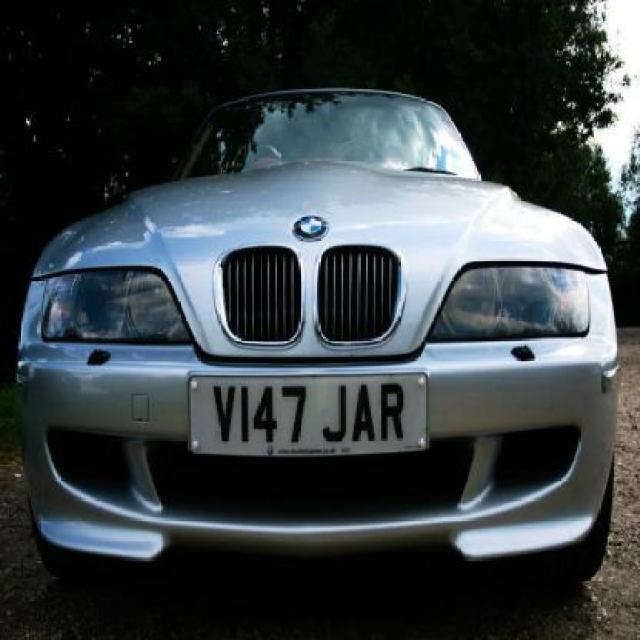

Running inference on bf2f25f3ed9ff4d5_jpg.rf.3d98357520a292164c6c8d6d51f363f3.jpg


{'predictions': [{'x': 307,
   'y': 415,
   'width': 253,
   'height': 80,
   'confidence': 0.8643816113471985,
   'class': 'license-plate',
   'class_id': 0,
   'detection_id': '1846e475-ed50-4c4b-9175-52e9886a6e0d',
   'image_path': '/content/datasets/licence-plate-detection-1/test/images/bf2f25f3ed9ff4d5_jpg.rf.3d98357520a292164c6c8d6d51f363f3.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 315,
   'y': 340,
   'width': 606,
   'height': 526,
   'confidence': 0.8000541925430298,
   'class': 'vehicle',
   'class_id': 1,
   'detection_id': '15351f45-0336-42ae-b605-1462a277343a',
   'image_path': '/content/datasets/licence-plate-detection-1/test/images/bf2f25f3ed9ff4d5_jpg.rf.3d98357520a292164c6c8d6d51f363f3.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}

In [ ]:
#loading the model that we just built
model = project.version(dataset.version).model

#choose random test set image
import os, random
# # test_set_loc = dataset.location + "/test/images/"
# # random_test_image = random.choice(os.listdir(test_set_loc))
# random_test_image_path = "/content/datasets/licence-plate-detection-1/test/images/be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg"
# random_test_image = "be9fd0014b5a4f2a_jpg.rf.36eea3acd5b2abd41c9d7f59390452cf.jpg"
# print("running inference on " + random_test_image)


# Define test set image folder
test_set_loc = dataset.location + "/test/images/"

# Choose a random image from the test set
random_test_image = random.choice([f for f in os.listdir(test_set_loc) if f.endswith(('.jpg', '.jpeg', '.png'))])
random_test_image_path = os.path.join(test_set_loc, random_test_image)

# Load and show the image
img = cv2.imread(random_test_image_path)
cv2_imshow(img)

print("Running inference on " + random_test_image)

pred = model.predict(random_test_image_path, confidence=40, overlap=30).json()
pred

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
from matplotlib import pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

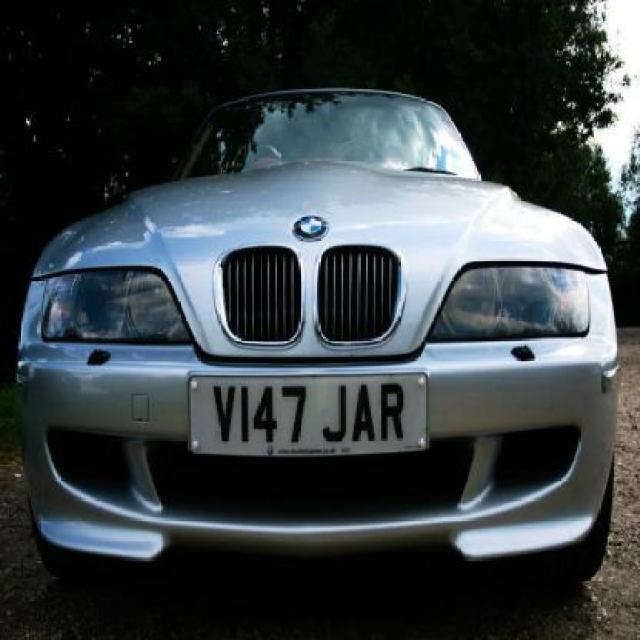


Extracted licence plate:



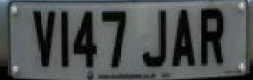

In [ ]:
midx = pred['predictions'][0]['x']
midy = pred['predictions'][0]['y']
width = pred['predictions'][0]['width']
height = pred['predictions'][0]['height']

xmin =int(midx - width/2)
xmax = int(midx + width/2)
ymin = int(midy - height/2)
ymax = int(midy + height/2)

import cv2
img = cv2.imread(random_test_image_path)
crop_img = img[ymin:ymax, xmin:xmax]

cv2_imshow(img)
print('\nExtracted licence plate:\n')
cv2_imshow(crop_img)



In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(crop_img)
print('Licence number: ', result[0][1])

Licence number:  VI47 JAR


In [ ]:
# Load your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluate on the test set (defined in your YAML file)
metrics = model.val(data='/content/datasets/licence-plate-detection-1/data.yaml')

# Print results
print(metrics)  # This includes mAP@0.5, mAP@0.5:0.95, precision, recall

# model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1202.2±412.4 MB/s, size: 46.6 KB)


val: Scanning /content/datasets/licence-plate-detection-1/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


                   all         70        218      0.851      0.756      0.845      0.662
         license-plate         70         84       0.87       0.81      0.895       0.69
               vehicle         68        134      0.832      0.701      0.795      0.635
Speed: 5.6ms preprocess, 19.6ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/val2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e420c163d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     